In [393]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [400]:
lamb = 800*1e-9 #m
kB = 1.380649*1e-23 #J*K**-1
m=2.66*1e-26 #Kg, Here, im considering the mass of CH4
c = 3*1e8 #m/s
r=71*1e-9
P = 100 #mW?
T = 300 #K
waist = 5*1e-6

In [ ]:
Intensity = P/(np.pi*waist**2)

1273239544735.163


In [395]:
k_1 = 2*np.pi/lamb
k_2 = 2*np.pi/lamb
a = 2.14*1e12
beta = 1e19
q = k_1 + k_2
psi = (2*beta)/(a*q)
print(psi,q,a,beta)

0.5949717498762442 15707963.267948965 2140000000000.0002 1e+19


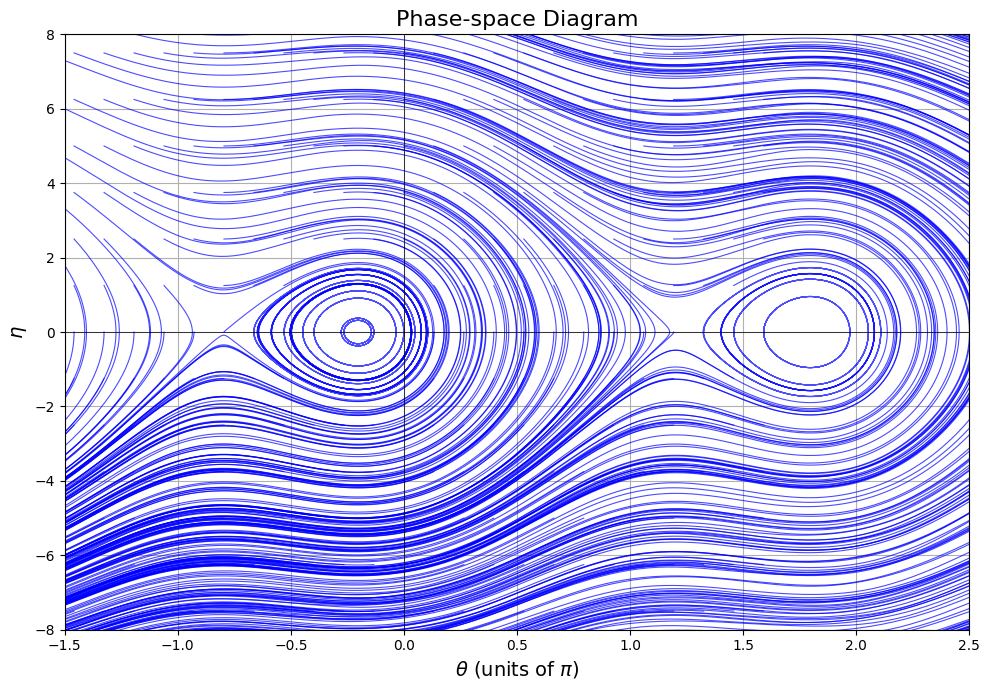

In [396]:
def difeq_velocity(t, y):
    theta, eta = y
    return [eta, -2*(psi**-1)*np.sin(theta)-2]

thetas = np.linspace(-5, 5, 25)
etas = np.linspace(-15, 15, 25)

plt.figure(figsize=(10, 7))

for theta0 in thetas:
    for eta0 in etas:
        sol = solve_ivp(difeq_velocity, (0, 30), [theta0, eta0], t_eval=np.linspace(0, 20, 1000))
        plt.plot(sol.y[0]/np.pi, sol.y[1], color='blue', linewidth=0.8, alpha=0.7)

plt.title('Phase-space Diagram', fontsize=16)
plt.xlabel(r'$\theta$ (units of $\pi$)', fontsize=14)
plt.ylabel(r'$\eta$', fontsize=14)
plt.grid(True)
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.xlim(-1.5, 2.5)
plt.ylim(-8, 8)
plt.tight_layout()
plt.show()

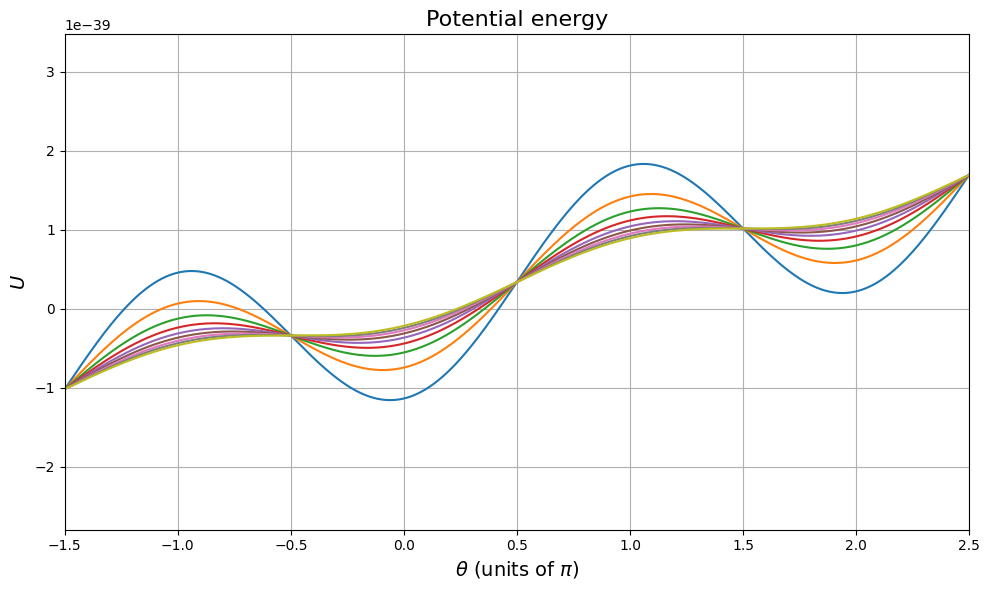

In [397]:
psiss = [0.19,0.29,0.39,0.49,0.59,0.69,0.79,0.89,1]
thetas = np.linspace(-10, 10, 1000)

plt.figure(figsize=(10, 6))
for psis in psiss:
    U = -((2*m)/(q**2))*((1/psis)*np.cos(thetas)-thetas)
    plt.plot(thetas/np.pi,U)

plt.title('Potential energy', fontsize=16)
plt.xlabel(r'$\theta$ (units of $\pi$)', fontsize=14)
plt.ylabel(r'$U$', fontsize=14)
plt.xlim(-1.5, 2.5)
#plt.ylim(-15,20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [398]:
delta_U = ((m*a)/(q))*(2*np.cos(np.arcsin(psi))-psi*(np.pi-2*np.arcsin(psi)))
delta_v = 2*((2*delta_U/m)**(1/2))
print(delta_v,delta_U/kB)

735.692710048277 130.34706967740843
